In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/Digit Recognizer')

Reading in and transforming data
Cost at iteration i=0, j=0: 2364.853557
Error rate: 0.852
Cost at iteration i=0, j=10: 1817.135872
Error rate: 0.525
Cost at iteration i=0, j=20: 1463.753119
Error rate: 0.352
Cost at iteration i=0, j=30: 1226.883263
Error rate: 0.275
Cost at iteration i=0, j=40: 1061.003050
Error rate: 0.233
Cost at iteration i=0, j=50: 943.250249
Error rate: 0.219
Cost at iteration i=0, j=60: 851.926263
Error rate: 0.205
Cost at iteration i=0, j=70: 781.990677
Error rate: 0.193
Cost at iteration i=0, j=80: 724.464802
Error rate: 0.177
Cost at iteration i=1, j=0: 715.635660
Error rate: 0.177
Cost at iteration i=1, j=10: 669.238737
Error rate: 0.169
Cost at iteration i=1, j=20: 631.571394
Error rate: 0.153
Cost at iteration i=1, j=30: 598.110260
Error rate: 0.146
Cost at iteration i=1, j=40: 570.389213
Error rate: 0.137
Cost at iteration i=1, j=50: 545.896912
Error rate: 0.135
Cost at iteration i=1, j=60: 524.133867
Error rate: 0.128
Cost at iteration i=1, j=70: 506.329

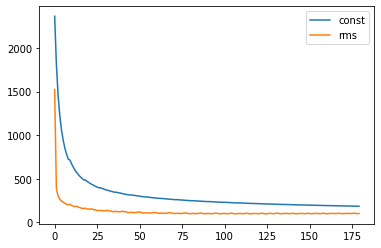

In [2]:
from __future__ import print_function, division
from builtins import range

import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from util import get_normalized_data, error_rate, cost, y2indicator
from mlp import forward, derivative_w2, derivative_w1, derivative_b2, derivative_b1


def main():
    max_iter = 20 # make it 30 for sigmoid
    print_period = 10

    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
    lr = 0.00004
    reg = 0.01

    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz

    M = 300
    K = 10
    W1 = np.random.randn(D, M) / np.sqrt(D)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)

    # 1. const
    # cost = -16
    LL_batch = []
    CR_batch = []
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            # print "first batch cost:", cost(pYbatch, Ybatch)

            # updates
            W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
            b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
            W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
            b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

            if j % print_period == 0:
                # calculate just for LL
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                # print "pY:", pY
                ll = cost(pY, Ytest_ind)
                LL_batch.append(ll)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

                err = error_rate(pY, Ytest)
                CR_batch.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))


    # 2. RMSprop
    W1 = np.random.randn(D, M) / np.sqrt(D)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)
    LL_rms = []
    CR_rms = []
    lr0 = 0.001 # if set too high we might get NaN!
    cache_W2 = 1
    cache_b2 = 1
    cache_W1 = 1
    cache_b1 = 1
    decay_rate = 0.999
    eps = 1e-10
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            # print "first batch cost:", cost(pYbatch, Ybatch)

            # updates
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
            W2 -= lr0 * gW2 / (np.sqrt(cache_W2) + eps)

            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
            b2 -= lr0 * gb2 / (np.sqrt(cache_b2) + eps)

            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
            W1 -= lr0 * gW1 / (np.sqrt(cache_W1) + eps)

            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
            b1 -= lr0 * gb1 / (np.sqrt(cache_b1) + eps)

            if j % print_period == 0:
                # calculate just for LL
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                # print "pY:", pY
                ll = cost(pY, Ytest_ind)
                LL_rms.append(ll)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

                err = error_rate(pY, Ytest)
                CR_rms.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))

    plt.plot(LL_batch, label='const')
    plt.plot(LL_rms, label='rms')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()